# **PHÂN NHÓM KHÁCH HÀNG VỚI KMEANS**

<img src='https://wearethecity.com/wp-content/uploads/2020/09/Diverse-group-of-stylish-people-standing-together.-Society-or-population-social-diversity.jpg'>

Nếu bạn muốn phát triển doanh nghiệp, việc nắm bắt đặc điểm của khách hàng là quan trọng vì ít nhất hai điều:

Để tiếp tục cung cấp những gì nhóm khách hàng này muốn và giữ họ lại.
Để định hình chiến lược tiếp thị vào những người tiêu dùng giống những khách hàng tốt nhất của bạn.
Bằng cách dùng chiến lược tiếp thị để thu hút những người mới thông qua những thông tin về khách hàng tốt nhất của bạn, bạn có thể thu hút những người có thể phản ứng tích cực với điểm mạnh của doanh nghiệp và giữ họ làm khách hàng trung thành. Thay vì tiếp cận tất cả khách hàng cùng một lúc, bạn có thể chia nhóm khách hàng và sử dụng chiến lược khác nhau cho từng nhóm. Điều này cũng giúp bạn tập trung vào khách hàng tiềm năng để phát triển chiến lược cho họ.

Tuy nhiên, trước khi bạn có thể hiểu rõ về khách hàng tốt nhất của mình, bạn cần xác định họ trước. Và đó là lúc một công cụ đơn giản trong tiếp thị gọi là phân tích RECENCY, FREQUENCY, MONETARY (hoặc RFM) trở nên hữu ích.

# 0. Nhập thư viện

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 1. Đọc dữ liệu

Bộ dữ liệu này chứa thông tin về tất cả các giao dịch mua sắm được thực hiện cho một công ty bán lẻ trực tuyến có trụ sở tại Vương Quốc Anh trong khoảng tám tháng.







In [ ]:
df = pd.read_csv('OnlineRetail.csv', encoding = "unicode_escape")

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# 2. Làm sạch dữ liệu

In [ ]:
# Tập trung chỉ vào thị trường Vương Quốc Anh và loại bỏ các dữ liệu khác
df = df[df['Country'] == 'United Kingdom']

# Loại bỏ cột 'Country' vì chỉ có dữ liệu của Vương Quốc Anh
df.drop(columns=['Country'], inplace=True)

# Loại bỏ các dòng trùng lặp
df.drop_duplicates(inplace=True)

# Phân tích liên quan đến Khách hàng. Loại bỏ tất cả các giao dịch có giá trị NaN trong cột CustomerID.
df = df[df['CustomerID'].notna()]

# Chuyển đổi cột 'InvoiceDate' thành kiểu dữ liệu chuỗi thời gian
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

<ipython-input-6-8131c4de5286>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Country'], inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356728 entries, 0 to 541893
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    356728 non-null  object        
 1   StockCode    356728 non-null  object        
 2   Description  356728 non-null  object        
 3   Quantity     356728 non-null  int64         
 4   InvoiceDate  356728 non-null  datetime64[ns]
 5   UnitPrice    356728 non-null  float64       
 6   CustomerID   356728 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 21.8+ MB


In [ ]:
# Tạo biến mới: Revenue = Quantity * UnitPrice
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,20.34


# 3. Phân nhóm khách hàng dùng chỉ số RFM

<img src='https://d35fo82fjcw0y8.cloudfront.net/2018/03/01013508/Incontent_image.png'>


**RFM là viết tắt của Recency - Frequency - Monetary Value**.

Phân tích RFM đánh giá mức độ quan trọng của mỗi khách hàng dựa trên ba điểm chính: thời gian gần đây mua sắm (Recency), tần suất mua sắm (Frequency), và giá trị tiền bạc mà họ chi tiêu (Monetary Value). Điểm số được gán từ 1 đến 5, với số càng cao thể hiện kết quả tốt hơn. Khách hàng được coi là "tốt nhất" khi có điểm cao nhất trong mỗi tiêu chí này.


Nếu nhìn theo lý thuyết, chúng ta có thể chia khách hàng thành các nhóm như sau:

🥲 GIÁ TRỊ THẤP: Những khách hàng ít hoạt động hơn so với người khác, không mua sắm hoặc ghé thăm thường xuyên và tạo ra doanh thu rất thấp.

🙂 GIÁ TRỊ TRUNG BÌNH: Nằm giữa mọi thứ. Mua sắm thường xuyên (nhưng không nhiều như Giá trị Cao) và tạo ra doanh thu trung bình.

🤑 GIÁ TRỊ CAO: Nhóm mà chúng ta muốn giữ chặt. Doanh thu cao và mua sắm thường xuyên.

## 3a / RECENCY

### Bước 1: Tính Recency

- Xác định ngày mua gần đây nhất của mỗi khách hàng và xem họ đã không hoạt động trong bao nhiêu ngày.
- Sau khi có số ngày không hoạt động cho mỗi khách hàng, chúng ta sẽ áp dụng phân cụm K-means để gán cho khách hàng một điểm Recency.

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,20.34


In [ ]:
# Bước 1: Tìm Ngày Mua Gần Nhất của mỗi khách hàng
recency = df.groupby('CustomerID')['InvoiceDate'].max().reset_index().rename(columns={'InvoiceDate': 'MaxPurchaseDate'})
recency

,CustomerID,MaxPurchaseDate
0,12346.0,2011-01-18 10:17:00
1,12747.0,2011-12-07 14:34:00
2,12748.0,2011-12-09 12:20:00
3,12749.0,2011-12-06 09:56:00
4,12820.0,2011-12-06 15:12:00
...,...,...
3945,18280.0,2011-03-07 09:52:00
3946,18281.0,2011-06-12 10:53:00
3947,18282.0,2011-12-02 11:43:00
3948,18283.0,2011-12-06 12:02:00


In [ ]:
# Bước 2: Tính toán cột mới gọi là Recency, đó là khoảng thời gian giữa ngày mua sắm gần nhất của mỗi khách hàng và ngày mua sắm gần nhất trong toàn bộ bộ dữ liệu.
recency['Recency'] = recency['MaxPurchaseDate'].max() - recency['MaxPurchaseDate']
recency

,CustomerID,MaxPurchaseDate,Recency
0,12346.0,2011-01-18 10:17:00,325 days 02:32:00
1,12747.0,2011-12-07 14:34:00,1 days 22:15:00
2,12748.0,2011-12-09 12:20:00,0 days 00:29:00
3,12749.0,2011-12-06 09:56:00,3 days 02:53:00
4,12820.0,2011-12-06 15:12:00,2 days 21:37:00
...,...,...,...
3945,18280.0,2011-03-07 09:52:00,277 days 02:57:00
3946,18281.0,2011-06-12 10:53:00,180 days 01:56:00
3947,18282.0,2011-12-02 11:43:00,7 days 01:06:00
3948,18283.0,2011-12-06 12:02:00,3 days 00:47:00


In [ ]:
# Bước 3: Chuyển đổi Recency thành số ngày
recency['Recency'] = recency['Recency'].dt.days
recency

,CustomerID,MaxPurchaseDate,Recency
0,12346.0,2011-01-18 10:17:00,325
1,12747.0,2011-12-07 14:34:00,1
2,12748.0,2011-12-09 12:20:00,0
3,12749.0,2011-12-06 09:56:00,3
4,12820.0,2011-12-06 15:12:00,2
...,...,...,...
3945,18280.0,2011-03-07 09:52:00,277
3946,18281.0,2011-06-12 10:53:00,180
3947,18282.0,2011-12-02 11:43:00,7
3948,18283.0,2011-12-06 12:02:00,3


<Axes: xlabel='Recency', ylabel='Count'>

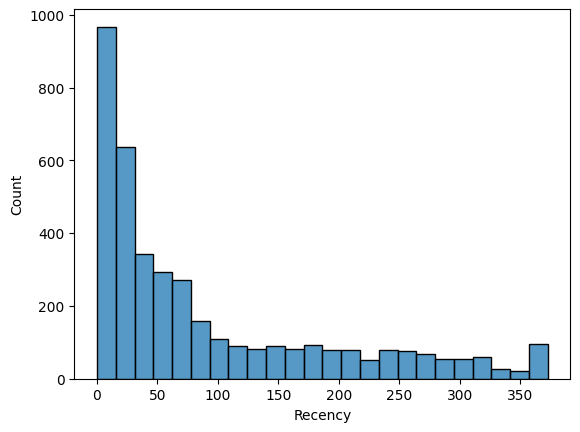

In [ ]:
# Vẽ biểu đồ histogram để hiển thị phân phối của Recency
sns.histplot(data=recency, x='Recency')

### Bước 2: Áp dụng phân cụm K-Means trên Recency để phân nhóm khách hàng.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

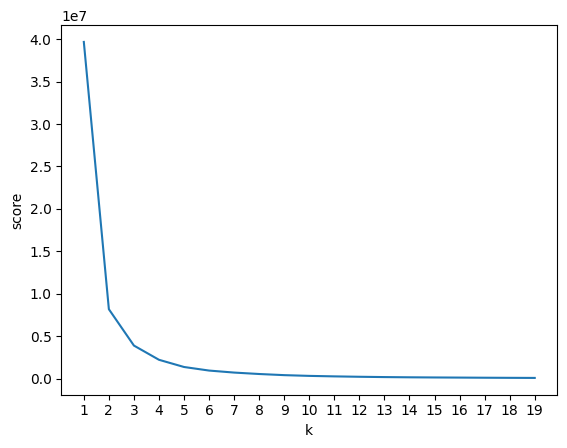

In [ ]:
from sklearn.cluster import KMeans

# Sử dụng phương pháp Elbow để xấp xỉ số lượng cụm.
X = recency[['Recency']].values

# Tính tổng khoảng cách từ từng data đến centroid tương ứng
# Số WWCS càng nhỏ --> Các data ở rất gần centroid mà nó thuộc về

wcss = []
k_values = range(1, 20)

for i in k_values:
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot
plt.plot(k_values, wcss)
plt.xlabel('k')
plt.xticks(range(1, 20))
plt.ylabel('score');

In [ ]:
# Gọi, fit mô hình KMeans và chạy dự đoán để xác định cụm của từng khách hàng.
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
clusters = kmeans.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
clusters

array([2, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
# Tạo một cột mới có tên là RecencyCluster để lưu thông tin cụm
recency['RecencyCluster'] = clusters
recency

,CustomerID,MaxPurchaseDate,Recency,RecencyCluster
0,12346.0,2011-01-18 10:17:00,325,2
1,12747.0,2011-12-07 14:34:00,1,1
2,12748.0,2011-12-09 12:20:00,0,1
3,12749.0,2011-12-06 09:56:00,3,1
4,12820.0,2011-12-06 15:12:00,2,1
...,...,...,...,...
3945,18280.0,2011-03-07 09:52:00,277,2
3946,18281.0,2011-06-12 10:53:00,180,0
3947,18282.0,2011-12-02 11:43:00,7,1
3948,18283.0,2011-12-06 12:02:00,3,1


In [ ]:
recency.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,735.0,153.185034,38.155512,92.0,119.0,153.0,185.00,222.0
1,2651.0,30.307808,24.994104,0.0,9.0,24.0,49.00,91.0
2,564.0,293.684397,45.612310,224.0,255.0,286.5,326.75,373.0


We have sucessfully cluster our customers. However, in order to use the cluster indices to be our Recency Score, we need to rearrange the indices a bit. The higher the recency, the less the value that customer brings to us, so higher recency should result in a lower score. We will use the function below for this task (Make sure to set ascending = False)

In [ ]:
def order_cluster(cluster_field_name, target_field_name, df, ascending):
    """Rearange cluster in such order that the higher the recency, the less the value
       that customer brings to us, so higher recency should result in a lower score."""

    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name, ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})

    return df_final

recency = order_cluster('RecencyCluster', 'Recency', recency, False)

In [ ]:
recency.head()

,CustomerID,MaxPurchaseDate,Recency,RecencyCluster
0,12346.0,2011-01-18 10:17:00,325,0
1,12829.0,2011-01-21 12:56:00,321,0
2,12831.0,2011-03-22 13:02:00,261,0
3,12834.0,2011-03-02 09:49:00,282,0
4,12845.0,2011-03-17 13:34:00,266,0


In [ ]:
# Check the descriptive statistics report of each group
recency.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,564.0,293.684397,45.612310,224.0,255.0,286.5,326.75,373.0
1,735.0,153.185034,38.155512,92.0,119.0,153.0,185.00,222.0
2,2651.0,30.307808,24.994104,0.0,9.0,24.0,49.00,91.0


Higher score for Recency = better customers (as their inactive time is low)

## 3b / FREQUENCY

### Bước 1: Tính Frequency

✍🏼 We just need to find total number orders for each customer. Simply that! 🙆🏻‍♂️

In [ ]:
# Tìm tổng số đơn hàng của mỗi khách hàng.
# count --> đếm chỉ các giá trị không rỗng --> toàn bộ các cột
# .size --> đếm tất cả --> chỉ trả về 1 cột
frequency = df.groupby('CustomerID').size().reset_index().rename(columns={0: 'Frequency'})
frequency

,CustomerID,Frequency
0,12346.0,2
1,12747.0,103
2,12748.0,4459
3,12749.0,231
4,12820.0,59
...,...,...
3945,18280.0,10
3946,18281.0,7
3947,18282.0,13
3948,18283.0,721


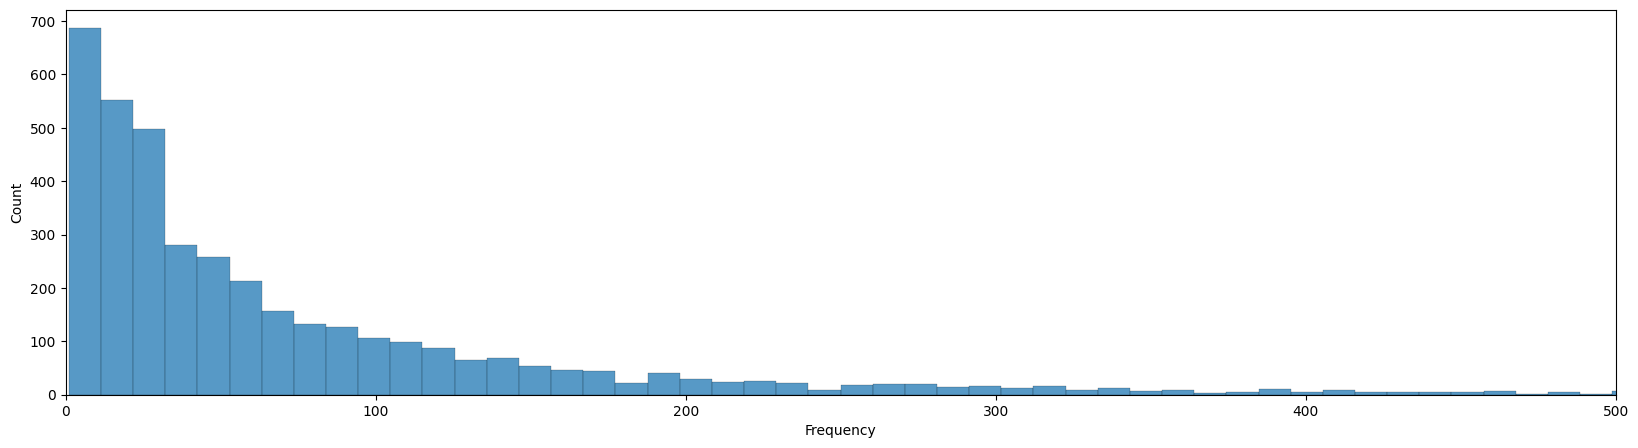

In [ ]:
# Vẽ biểu đồ histogram để biểu thị phân phối của Frequency
plt.figure(figsize=(20, 5))
sns.histplot(data=frequency, x='Frequency')
plt.xlim(0, 500)
plt.show()

### Bước 2: Áp dụng K-Means lên frequency

In [ ]:
X = frequency[['Frequency']].values

In [ ]:
# Dùng phương pháp Elbow
k_range = range(1, 20)

wcss = []
for i in k_range:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

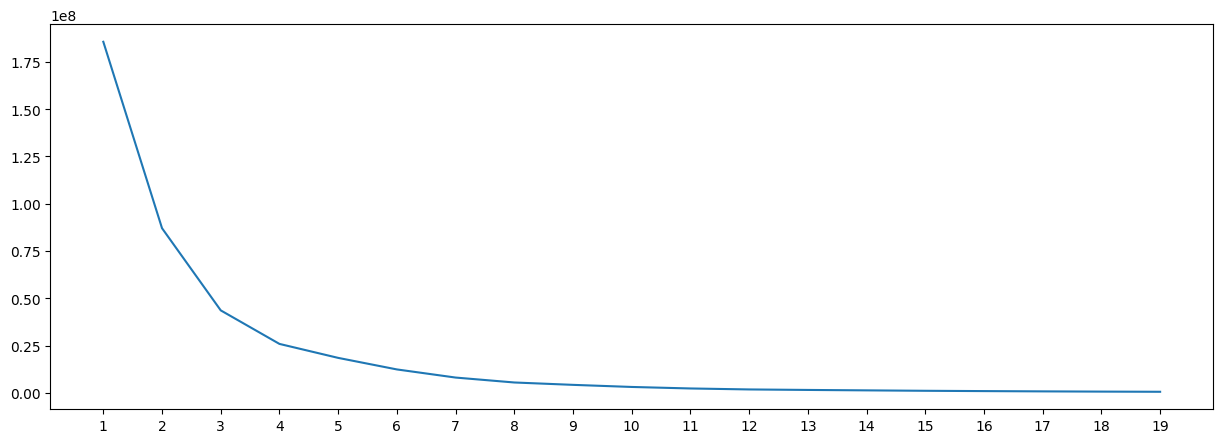

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(k_range, wcss)
plt.xticks(k_range)
plt.show()

In [ ]:
# Gọi, fit mô hình KMeans, và chạy dự đoán để xác định cụm của mỗi khách hàng.
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Tạo một cột mới có tên là FrequencyCluster để lưu thông tin cụm
frequency['FrequencyCluster'] = clusters
frequency

,CustomerID,Frequency,FrequencyCluster
0,12346.0,2,0
1,12747.0,103,0
2,12748.0,4459,1
3,12749.0,231,0
4,12820.0,59,0
...,...,...,...
3945,18280.0,10,0
3946,18281.0,7,0
3947,18282.0,13,0
3948,18283.0,721,2


In [ ]:
frequency.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,3684.0,57.720413,57.722425,1.0,15.75,36.0,82.25,268.0
1,3.0,5799.666667,1774.543415,4459.0,4793.50,5128.0,6470.00,7812.0
2,263.0,481.699620,309.272066,270.0,312.50,392.0,518.50,2759.0


In [ ]:
# Sắp xếp lại các cụm Frequency
frequency = order_cluster('FrequencyCluster', 'Frequency', frequency, True)

In [ ]:
frequency.head()

,CustomerID,Frequency,FrequencyCluster
0,12346.0,2,0
1,12747.0,103,0
2,12749.0,231,0
3,12820.0,59,0
4,12821.0,6,0


In [ ]:
# Xem báo cáo thống kê mô tả của mỗi nhóm khách hàng.
frequency.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,3684.0,57.720413,57.722425,1.0,15.75,36.0,82.25,268.0
1,263.0,481.699620,309.272066,270.0,312.50,392.0,518.50,2759.0
2,3.0,5799.666667,1774.543415,4459.0,4793.50,5128.0,6470.00,7812.0


## 3c / REVENUE

In [ ]:
# Tính tổng doanh thu mà mỗi khách hàng đã đạt được
revenue = df.groupby('CustomerID')['Revenue'].sum().reset_index()
revenue.head()

,CustomerID,Revenue
0,12346.0,0.00
1,12747.0,4196.01
2,12748.0,28405.56
3,12749.0,3868.20
4,12820.0,942.34


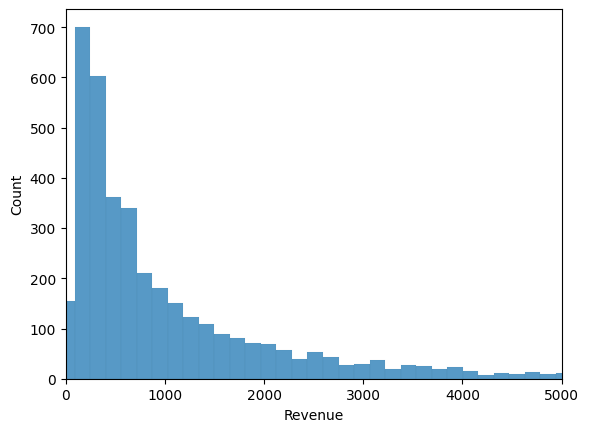

In [ ]:
# Vẽ biểu đồ histogram cho Doanh thu
sns.histplot(data=revenue, x='Revenue')
plt.xlim(0, 5000)
plt.show()

In [ ]:
X = revenue[['Revenue']].values

In [ ]:
# Sử dụng phương pháp Elbow để xấp xỉ số lượng cụm.
k_range = range(1, 20)

wcss = []
for i in k_range:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

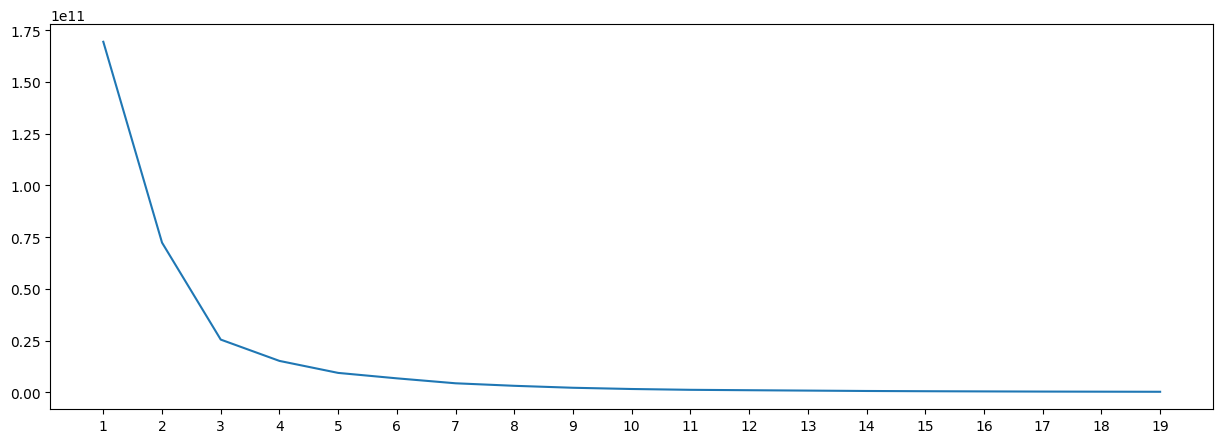

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(k_range, wcss)
plt.xticks(k_range)
plt.show()

In [ ]:
# Gọi, fit mô hình KMeans và chạy dự đoán để xác định cụm của mỗi khách hàng.
kmeans = KMeans(n_clusters=3, random_state=42)
cluster = kmeans.fit_predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Tạo một cột mới có tên là RevenueCluster để lưu thông tin cụm
revenue['RevenueCluster'] = cluster

In [ ]:
revenue.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,3921.0,1310.792062,2050.418988,-4287.63,278.15,617.05,1482.060,21535.90
1,2.0,221880.330000,48872.618563,187322.17,204601.25,221880.33,239159.410,256438.49
2,27.0,43102.956296,16007.049228,25748.35,28532.22,36352.87,53698.715,88125.38


In [ ]:
revenue[revenue['Revenue'] < 0]

,CustomerID,Revenue,RevenueCluster
41,12870.0,-1.490000e+01,0
92,12943.0,-3.750000e+00,0
244,13154.0,-6.118600e+02,0
611,13672.0,-7.146000e+01,0
624,13693.0,-3.200000e+01,0
717,13829.0,-1.020000e+02,0
810,13958.0,-1.024500e+02,0
927,14119.0,-1.990000e+01,0
992,14213.0,-1.192200e+03,0
1149,14437.0,-4.340000e+01,0


In [ ]:
df[df['CustomerID'] == 12870.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue
18974,C537824,22220,CAKE STAND LOVEBIRD 2 TIER WHITE,-1,2010-12-08 14:27:00,9.95,12870.0,-9.95
18975,C537824,22784,LANTERN CREAM GAZEBO,-1,2010-12-08 14:27:00,4.95,12870.0,-4.95


In [ ]:
# Sắp xếp lại các cụm Revenue
revenue = order_cluster('RevenueCluster', 'Revenue', revenue, True)

In [ ]:
revenue.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,3921.0,1310.792062,2050.418988,-4287.63,278.15,617.05,1482.060,21535.90
1,27.0,43102.956296,16007.049228,25748.35,28532.22,36352.87,53698.715,88125.38
2,2.0,221880.330000,48872.618563,187322.17,204601.25,221880.33,239159.410,256438.49


## 3d / RFM SCORE

In [ ]:
recency.head()

,CustomerID,MaxPurchaseDate,Recency,RecencyCluster
0,12346.0,2011-01-18 10:17:00,325,0
1,12829.0,2011-01-21 12:56:00,321,0
2,12831.0,2011-03-22 13:02:00,261,0
3,12834.0,2011-03-02 09:49:00,282,0
4,12845.0,2011-03-17 13:34:00,266,0


In [ ]:
frequency.head()

,CustomerID,Frequency,FrequencyCluster
0,12346.0,2,0
1,12747.0,103,0
2,12749.0,231,0
3,12820.0,59,0
4,12821.0,6,0


In [ ]:
revenue.head()

,CustomerID,Revenue,RevenueCluster
0,12346.0,0.00,0
1,12747.0,4196.01,0
2,12749.0,3868.20,0
3,12820.0,942.34,0
4,12821.0,92.72,0


In [ ]:
# Kết hợp ba bảng recency, frequency và revenue lại với nhau.
final_rfm = pd.merge(recency[['CustomerID', 'Recency', 'RecencyCluster']], frequency, on='CustomerID')
final_rfm = pd.merge(final_rfm, revenue, on='CustomerID')
final_rfm.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster
0,12346.0,325,0,2,0,0.00,0
1,12829.0,321,0,12,0,253.05,0
2,12831.0,261,0,9,0,215.05,0
3,12834.0,282,0,18,0,312.38,0
4,12845.0,266,0,27,0,354.09,0


In [ ]:
# Tạo một cột có tên là RFM_score, là tổng của ba điểm cụm.
final_rfm['RFM_score'] = final_rfm['RecencyCluster'] + final_rfm['FrequencyCluster'] + final_rfm['RevenueCluster']
final_rfm.sample(10)


,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,RFM_score
186,14693.0,263,0,8,0,172.90,0,0
3644,16050.0,173,1,10,0,137.90,0,1
3433,14403.0,129,1,26,0,1426.31,0,1
2811,17428.0,0,2,343,1,17078.45,0,3
213,15057.0,274,0,25,0,1489.50,0,0
1594,14960.0,7,2,27,0,221.27,0,2
2186,16170.0,50,2,127,0,1880.42,0,2
1037,13823.0,18,2,40,0,957.66,0,2
3683,16324.0,127,1,111,0,408.59,0,1
2210,16208.0,44,2,66,0,664.26,0,2


In [ ]:
# Lấy số lượng nhóm khách hàng
final_rfm['RFM_score'].value_counts()


2    2385
1     732
0     563
3     250
4      15
5       5
Name: RFM_score, dtype: int64

In [ ]:
# Tổng cộng, hiện chúng ta có 10 cụm khách hàng dựa trên RFM_score. Tìm giá trị trung bình của Recency, Frequency và Revenue của mỗi nhóm.
final_rfm.groupby('RFM_score')[['Recency', 'Frequency', 'Revenue']].mean()


,Recency,Frequency,Revenue
RFM_score,,,
0,293.671403,22.454707,374.165258
1,153.510929,38.431694,649.885398
2,32.515304,72.305660,1317.217959
3,12.820000,451.268000,6507.490560
4,6.866667,833.733333,48212.756667
5,2.200000,3636.400000,113831.236000


# 4. Kết luận

In [ ]:
final_rfm['Segmentation'] = 'Low'
final_rfm.loc[final_rfm['RFM_score'] > 1, 'Segmentation'] = 'Mid'
final_rfm.loc[final_rfm['RFM_score'] > 3, 'Segmentation'] = 'High'

In [ ]:
final_rfm.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,RFM_score,Segmentation
0,12346.0,325,0,2,0,0.00,0,0,Low
1,12829.0,321,0,12,0,253.05,0,0,Low
2,12831.0,261,0,9,0,215.05,0,0,Low
3,12834.0,282,0,18,0,312.38,0,0,Low
4,12845.0,266,0,27,0,354.09,0,0,Low


In [ ]:
final_rfm['Segmentation'].value_counts()

Mid     2635
Low     1295
High      20
Name: Segmentation, dtype: int64

Trực quan hoá để hiểu về mỗi cụm hơn.

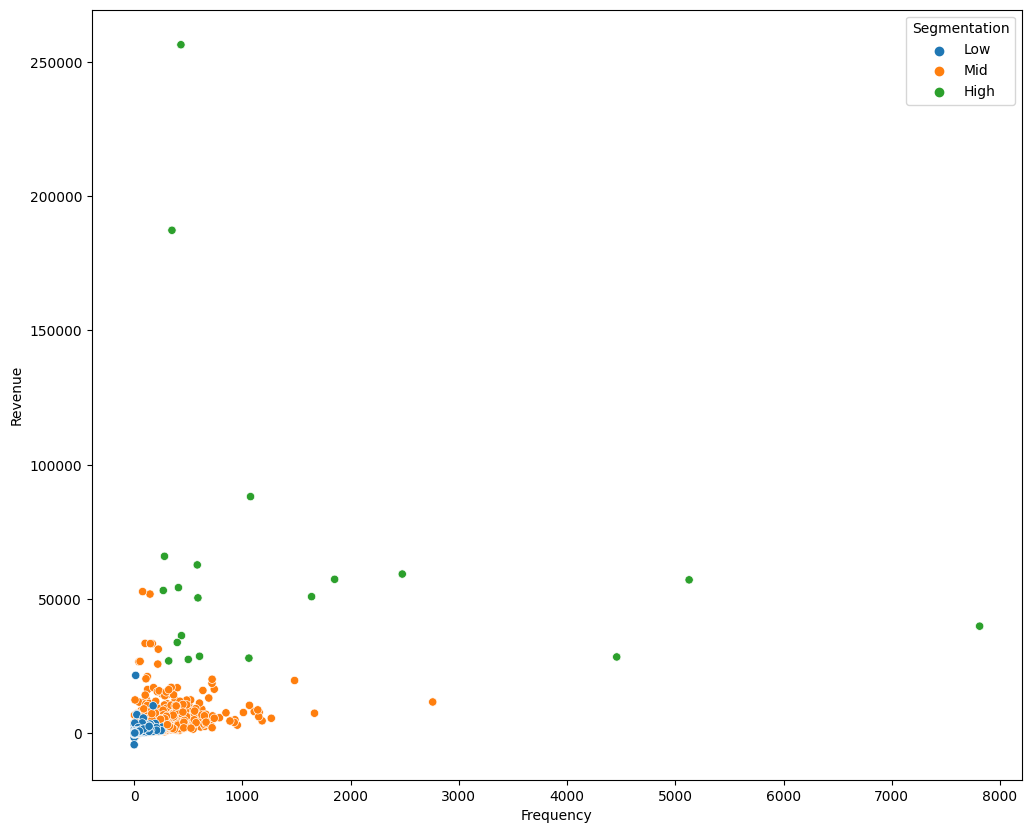

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=final_rfm,
                x="Frequency", y="Revenue", hue="Segmentation")
plt.show()

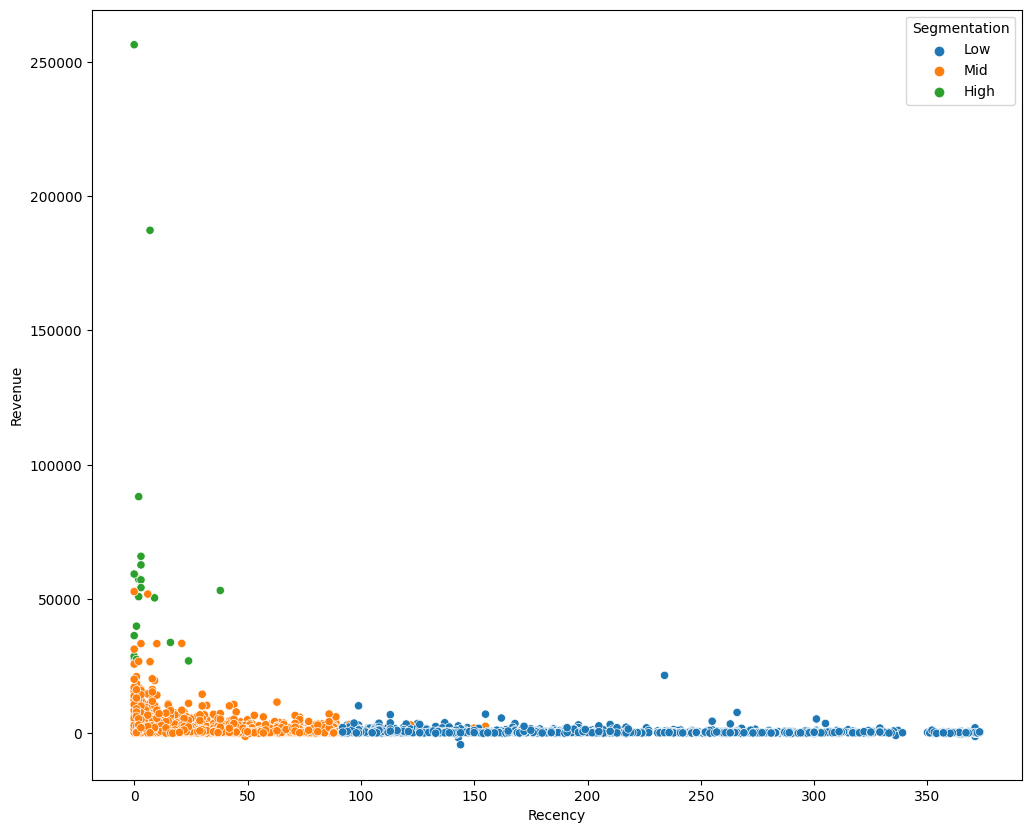

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=final_rfm,
                x="Recency", y="Revenue", hue="Segmentation")
plt.show()

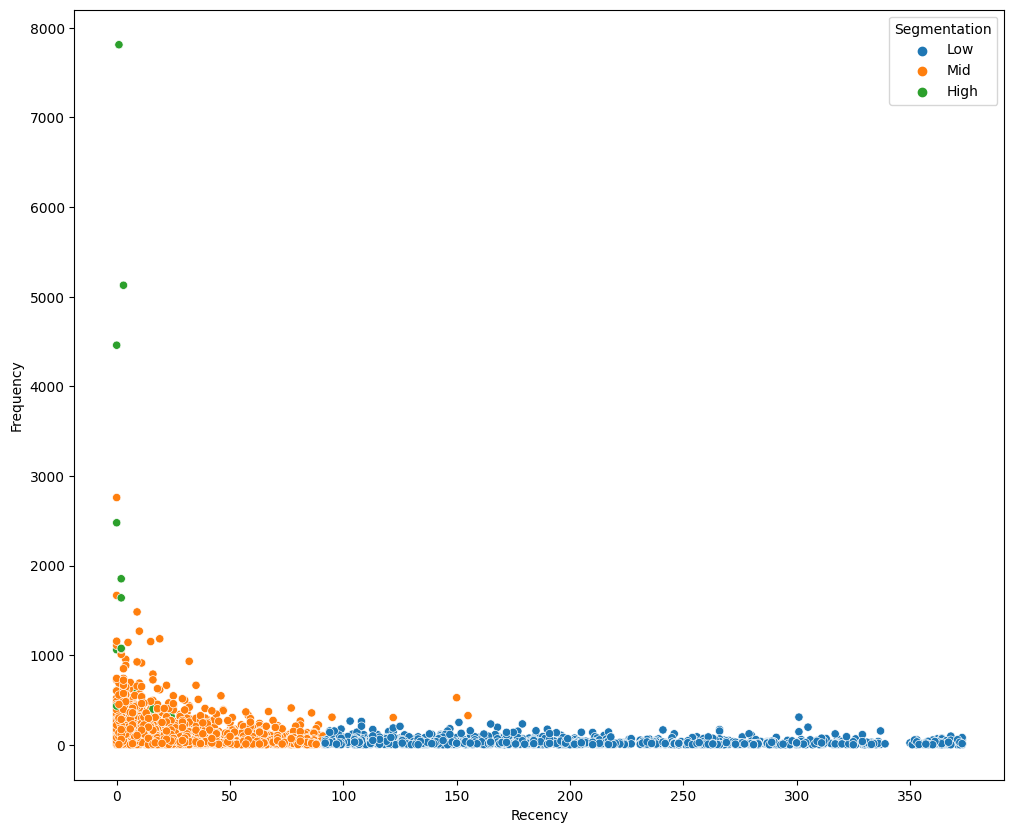

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=final_rfm,
                x="Recency",
                y="Frequency",
                hue="Segmentation")
plt.show()